# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

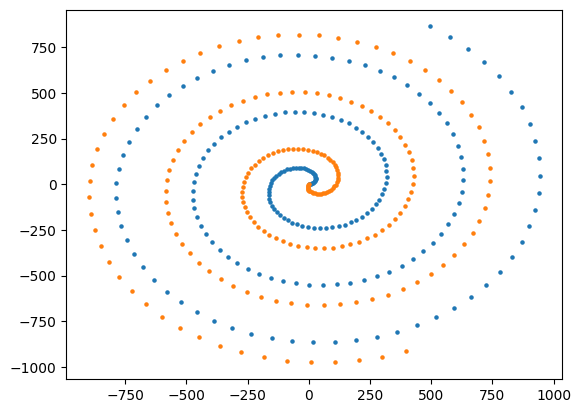

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

<ipython-input-4-b708e975e354>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


0    200
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [5]:
# your code here

In [6]:
df.head()

,X,Y,CLASS
0,0.000000,0.000000,0
1,4.975021,0.499167,0
2,9.800666,1.986693,0
3,14.330047,4.432803,0
4,18.421220,7.788367,0


In [7]:
df["XX"]=df["X"]*df["X"]
df["YY"]=df["Y"]*df["Y"]
df["sinX"]=np.sin(df["X"])
df["sinY"]=np.sin(df["Y"])

In [8]:
df.head()

,X,Y,CLASS,XX,YY,sinX,sinY
0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
1,4.975021,0.499167,0,24.750832,0.249168,-0.965710,0.478694
2,9.800666,1.986693,0,96.053050,3.946950,-0.367099,0.914754
3,14.330047,4.432803,0,205.350257,19.649743,0.981456,-0.961170
4,18.421220,7.788367,0,339.341342,60.658658,-0.415358,0.997848


In [9]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf # Library to construct neural newtorks. Low level library
from tensorflow import keras # High level library to handle tensorflow.
from tensorflow.keras.layers import Flatten, Dense, Dropout # Types of layers to use in our neural network.

import warnings
warnings.filterwarnings("ignore")

In [10]:
# Normalize the input data.

#Power Transformer
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

df_n = PowerTransformer().fit_transform(df)
df_n = pd.DataFrame(df_n, columns = df.columns)

#MinMaxScaler
df_n = MinMaxScaler().fit_transform(df_n)
df = pd.DataFrame(df_n, columns=df.columns) #convert np.array to pd.DataFrame

In [11]:
df

,X,Y,CLASS,XX,YY,sinX,sinY
0,0.487053,0.496864,0.0,0.000000,0.000000,0.497021,0.520610
1,0.489756,0.497136,0.0,0.060388,0.003171,0.016929,0.754465
2,0.492377,0.497955,0.0,0.099269,0.026211,0.313929,0.960383
3,0.494838,0.499311,0.0,0.126592,0.057778,0.990643,0.020858
4,0.497061,0.501183,0.0,0.147202,0.088740,0.289921,0.999017
...,...,...,...,...,...,...,...
395,0.491749,0.000000,1.0,0.091171,1.000000,0.850261,0.066347
396,0.544912,0.000385,1.0,0.369902,0.999669,0.332723,0.368616
397,0.598040,0.005728,1.0,0.503085,0.995050,0.478342,0.123749
398,0.650594,0.016029,1.0,0.601035,0.986060,0.194136,0.199939


In [12]:
# your code here
y= df["CLASS"]
x=df.drop(columns="CLASS")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=7)

print(X_train.shape)
print(X_test.shape)

(200, 6)
(200, 6)


In [13]:
optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',

)

model_cb = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features
# 9 neurons
# each neuron will have a "RELU" activation function
model_cb.add(Dense(units = 400,input_dim = X_train.shape[1],activation='relu'))
# Adding a new hidden layer with three neurons with "RELU" activation function
model_cb.add(Dense(units = 200,activation='relu'))
model_cb.add(Dense(units = 100,activation='relu'))
model_cb.add(Dense(units =50,activation='relu'))
model_cb.add(Dense(units = 25,activation='relu'))
# Adding the final layer
model_cb.add(Dense(units = 2, activation='softmax'))

# Compile the final network
model_cb.compile(optimizer="adam", # Optimization method
              loss='sparse_categorical_crossentropy', # Error metric to minimize
              metrics='accuracy' # Error metrics to report
              )


model_cb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               2800      
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 2)                 52        
                                                                 
Total params: 109,477
Trainable params: 109,477
Non-trai

In [14]:
from tensorflow.keras.callbacks import EarlyStopping # This callback allows you to stop the training if the validation error increases
from tensorflow.keras.callbacks import ModelCheckpoint # This callback allows you to save the model.
early_stopping = EarlyStopping(patience=5)

checkpoint_path = '/content/drive/MyDrive/Ironhack/cls-nn3.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [15]:
history_cb = model_cb.fit(
    X_train,
    y_train,
    epochs=1000,
    validation_split=0.20,
    batch_size=20,
    verbose=2,


)

Epoch 1/1000
8/8 - 4s - loss: 0.6959 - accuracy: 0.5063 - val_loss: 0.6942 - val_accuracy: 0.4750 - 4s/epoch - 452ms/step
Epoch 2/1000
8/8 - 0s - loss: 0.6955 - accuracy: 0.4437 - val_loss: 0.6930 - val_accuracy: 0.4250 - 104ms/epoch - 13ms/step
Epoch 3/1000
8/8 - 0s - loss: 0.6881 - accuracy: 0.5750 - val_loss: 0.6946 - val_accuracy: 0.5000 - 121ms/epoch - 15ms/step
Epoch 4/1000
8/8 - 0s - loss: 0.6850 - accuracy: 0.5938 - val_loss: 0.6954 - val_accuracy: 0.5000 - 144ms/epoch - 18ms/step
Epoch 5/1000
8/8 - 0s - loss: 0.6795 - accuracy: 0.5875 - val_loss: 0.6996 - val_accuracy: 0.4750 - 125ms/epoch - 16ms/step
Epoch 6/1000
8/8 - 0s - loss: 0.6826 - accuracy: 0.5188 - val_loss: 0.6868 - val_accuracy: 0.5000 - 126ms/epoch - 16ms/step
Epoch 7/1000
8/8 - 0s - loss: 0.6747 - accuracy: 0.5437 - val_loss: 0.6838 - val_accuracy: 0.5750 - 111ms/epoch - 14ms/step
Epoch 8/1000
8/8 - 0s - loss: 0.6693 - accuracy: 0.5562 - val_loss: 0.7087 - val_accuracy: 0.5000 - 146ms/epoch - 18ms/step
Epoch 9/10

In [16]:
def plot_metric(history, metric):
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

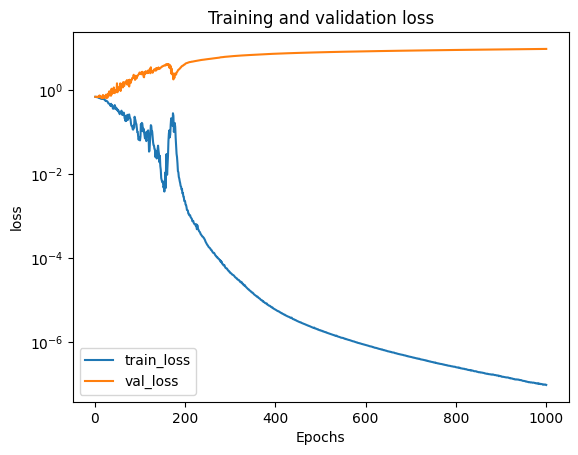

In [17]:
plot_metric(history_cb,'loss')

In [18]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [19]:
y_pred_train_cb = model_cb.predict(X_train) # This provides the probability for each class
y_pred_test_cb  = model_cb.predict(X_test) # This provides the probability for each class

# We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_cb = np.argmax(y_pred_train_cb, axis=1).reshape(-1,1)
y_pred_test_cb = np.argmax(y_pred_test_cb, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train_cb, y_test, y_pred_test_cb)

7/7 [==============================] - 0s 3ms/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.82
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       103
         1.0       0.89      0.93      0.91        97

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

Results obtained for the TEST SET
The Cohen's Kappa is: -0.03
              precision    recall  f1-score   support

         0.0       0.46      0.40      0.43        97
         1.0       0.50      0.56      0.53       103

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

